<a href="https://colab.research.google.com/github/stiwari-ds/data-science-competitions/blob/main/hackerearth/get_a_room_hackathon/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import os
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import f_classif, mutual_info_regression

SEED = 23
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)

In [2]:
data_url = 'https://raw.githubusercontent.com/stiwari-ds/data-science-competitions/main/hackerearth/get_a_room_hackathon/data/'

train = pd.read_csv(data_url + 'raw/train.csv')
test = pd.read_csv(data_url + 'raw/test.csv')

In [3]:
train.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

# Target column: Habitability_score

In [5]:
TARGET = 'Habitability_score'

In [6]:
train[TARGET].min(), train[TARGET].max()

(7.28, 100.0)

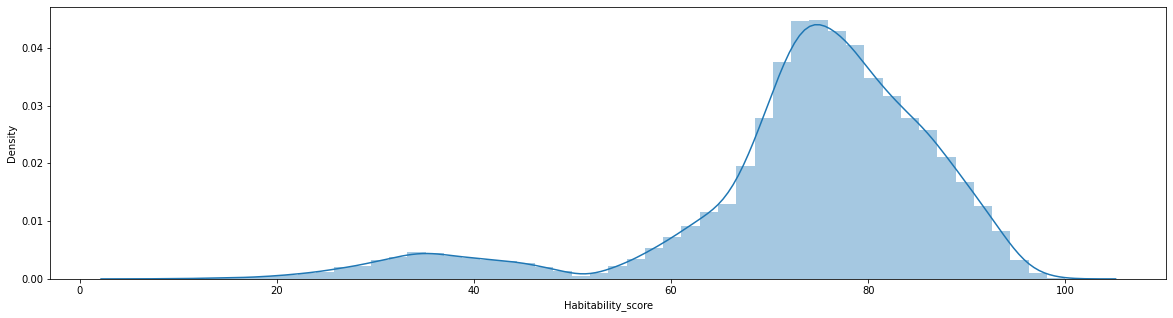

In [7]:
plt.figure(figsize=(20, 5))
sns.distplot(a=train[TARGET])
plt.show()

# Features

### Property_ID - unique identifier

In [8]:
train.Property_ID.nunique(), test.Property_ID.nunique()

(39499, 10500)

In [9]:
set(train.Property_ID.unique()).intersection(set(test.Property_ID.unique()))

set()

### Property_Type

In [10]:
train.Property_Type.nunique(), test.Property_Type.nunique()

(6, 6)

In [11]:
train.Property_Type.value_counts()

Apartment             14596
Single-family home    11477
Duplex                 5806
Bungalow               4238
Container Home         2872
#R%$G&867               510
Name: Property_Type, dtype: int64

In [12]:
test.Property_Type.value_counts()

Apartment             3853
Single-family home    3102
Duplex                1520
Bungalow              1105
Container Home         781
#R%$G&867              139
Name: Property_Type, dtype: int64

In [13]:
type_mapping = {
    'Apartment': 0,
    'Single-family home': 1,
    'Duplex': 2,
    'Bungalow': 3,
    'Container Home': 4,
    '#R%$G&867': 5
}

train.Property_Type.replace(type_mapping, inplace=True)
test.Property_Type.replace(type_mapping, inplace=True)

### Property_Area

In [14]:
train.Property_Area.min(), train.Property_Area.max()

(100, 28064)

In [15]:
test.Property_Area.min(), test.Property_Area.max()

(100, 27477)

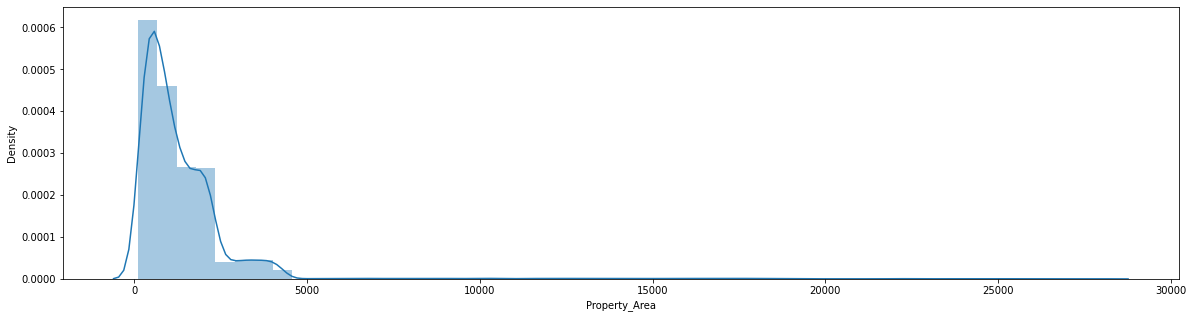

In [16]:
plt.figure(figsize=(20, 5))
sns.distplot(a=train.Property_Area)
plt.show()

In [17]:
train.loc[train.Property_Area > 5000]['Property_Area'].agg(['count', 'median', 'mean'])

count       616.000000
median    13397.000000
mean      13971.146104
Name: Property_Area, dtype: float64

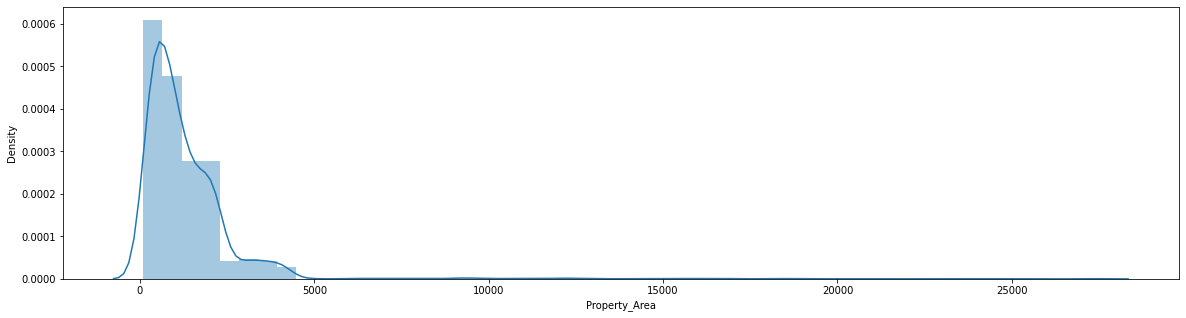

In [18]:
plt.figure(figsize=(20, 5))
sns.distplot(a=test.Property_Area)
plt.show()

In [19]:
test.loc[test.Property_Area > 5000]['Property_Area'].agg(['count', 'median', 'mean'])

count       149.000000
median    12127.000000
mean      13352.241611
Name: Property_Area, dtype: float64

### Number_of_Windows

In [20]:
train.Number_of_Windows.min(), test.Number_of_Windows.min()

(0.0, 0.0)

In [21]:
train.Number_of_Windows.max(), test.Number_of_Windows.max()

(15.0, 15.0)

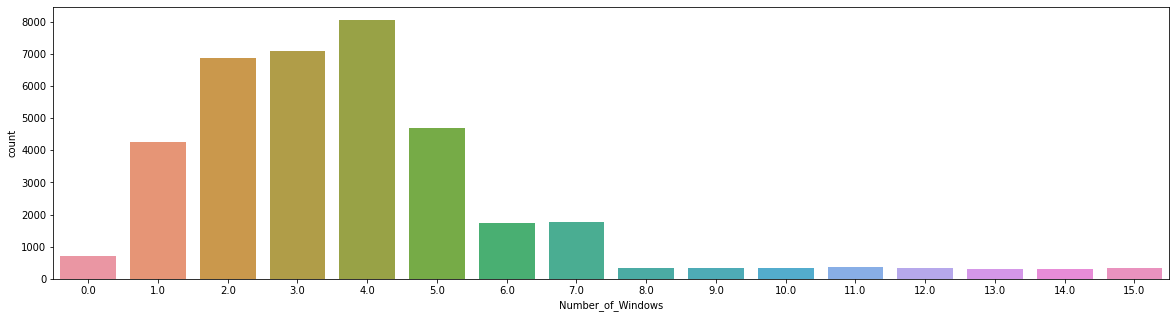

In [22]:
plt.figure(figsize=(20, 5))
sns.countplot(x='Number_of_Windows', data=train)
plt.show()

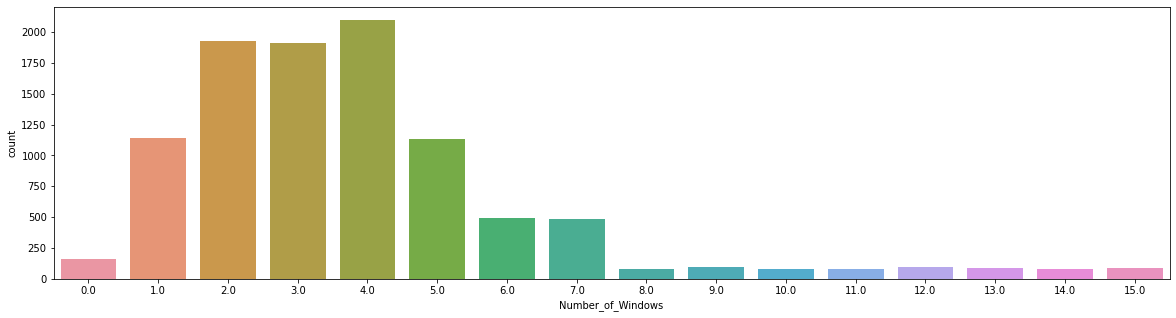

In [23]:
plt.figure(figsize=(20, 5))
sns.countplot(x='Number_of_Windows', data=test)
plt.show()

### Number_of_Doors

In [24]:
train.Number_of_Doors.min(), test.Number_of_Doors.min()

(1, 1)

In [25]:
train.Number_of_Doors.max(), test.Number_of_Doors.max()

(6, 6)

In [26]:
train.Number_of_Doors.value_counts(normalize=True)

2    0.302742
1    0.287020
3    0.269551
4    0.095926
6    0.022709
5    0.022051
Name: Number_of_Doors, dtype: float64

In [27]:
test.Number_of_Doors.value_counts(normalize=True)

2    0.306857
1    0.286381
3    0.266190
4    0.097429
6    0.022476
5    0.020667
Name: Number_of_Doors, dtype: float64

### Furnishing

In [28]:
train.Furnishing.value_counts(normalize=True, dropna=False)

Semi_Furnished     0.515380
Unfurnished        0.261880
Fully Furnished    0.196359
NaN                0.026380
Name: Furnishing, dtype: float64

In [29]:
test.Furnishing.value_counts(normalize=True, dropna=False)

Semi_Furnished     0.516000
Unfurnished        0.253238
Fully Furnished    0.206286
NaN                0.024476
Name: Furnishing, dtype: float64

In [30]:
train.groupby('Property_Type')['Furnishing'].value_counts(normalize=True, dropna=False)

Property_Type  Furnishing     
0              Semi_Furnished     0.515552
               Unfurnished        0.264799
               Fully Furnished    0.194231
               NaN                0.025418
1              Semi_Furnished     0.517470
               Unfurnished        0.258866
               Fully Furnished    0.197003
               NaN                0.026662
2              Semi_Furnished     0.524457
               Unfurnished        0.252325
               Fully Furnished    0.194282
               NaN                0.028936
3              Semi_Furnished     0.497404
               Unfurnished        0.276546
               Fully Furnished    0.197971
               NaN                0.028079
4              Semi_Furnished     0.518106
               Unfurnished        0.258357
               Fully Furnished    0.201950
               NaN                0.021588
5              Semi_Furnished     0.494118
               Unfurnished        0.252941
               Fully Fu

In [31]:
furnish_mapping = {
    'Unfurnished': 0,
    'Semi_Furnished': 1,
    'Fully Furnished': 2
}

train.Furnishing.replace(furnish_mapping, inplace=True)
test.Furnishing.replace(furnish_mapping, inplace=True)

### Frequency_of_Powercuts

In [32]:
train.Frequency_of_Powercuts.min(), test.Frequency_of_Powercuts.min()

(0.0, 0.0)

In [33]:
train.Frequency_of_Powercuts.max(), test.Frequency_of_Powercuts.max()

(3.0, 3.0)

In [34]:
train.Frequency_of_Powercuts.value_counts(normalize=True, dropna=False)

0.0    0.619535
1.0    0.253424
2.0    0.061799
NaN    0.035014
3.0    0.030229
Name: Frequency_of_Powercuts, dtype: float64

In [35]:
test.Frequency_of_Powercuts.value_counts(normalize=True, dropna=False)

0.0    0.618571
1.0    0.255333
2.0    0.061524
NaN    0.034857
3.0    0.029714
Name: Frequency_of_Powercuts, dtype: float64

### Power_Backup

In [36]:
train.Power_Backup.value_counts(normalize=True, dropna=False)

No               0.752272
Yes              0.226765
NOT MENTIONED    0.020963
Name: Power_Backup, dtype: float64

In [37]:
test.Power_Backup.value_counts(normalize=True, dropna=False)

No               0.759429
Yes              0.219524
NOT MENTIONED    0.021048
Name: Power_Backup, dtype: float64

In [38]:
backup_mapping = {
    'No': 0,
    'Yes': 1,
    'NOT MENTIONED': 2
}

train.Power_Backup.replace(backup_mapping, inplace=True)
test.Power_Backup.replace(backup_mapping, inplace=True)

### Water_Supply

In [39]:
train.Water_Supply.value_counts(normalize=True, dropna=False)

All time                   0.493962
Once in a day - Morning    0.250563
Once in a day - Evening    0.197853
Once in two days           0.048887
NOT MENTIONED              0.008734
Name: Water_Supply, dtype: float64

In [40]:
test.Water_Supply.value_counts(normalize=True, dropna=False)

All time                   0.494000
Once in a day - Morning    0.247333
Once in a day - Evening    0.201714
Once in two days           0.047048
NOT MENTIONED              0.009905
Name: Water_Supply, dtype: float64

In [41]:
water_mapping = {
    'All time': 0,
    'Once in a day - Morning': 1,
    'Once in a day - Evening': 2,
    'Once in two days': 3,
    'NOT MENTIONED': 4
}

train.Water_Supply.replace(water_mapping, inplace=True)
test.Water_Supply.replace(water_mapping, inplace=True)

### Traffic_Density_Score

In [42]:
train.Traffic_Density_Score.min(), test.Traffic_Density_Score.min()

(0.0, 0.02)

on a scale of 0 to 10 (not 1 to 10, as stated in the problem description)

In [43]:
train.Traffic_Density_Score.max(), test.Traffic_Density_Score.max()

(9.91, 9.43)

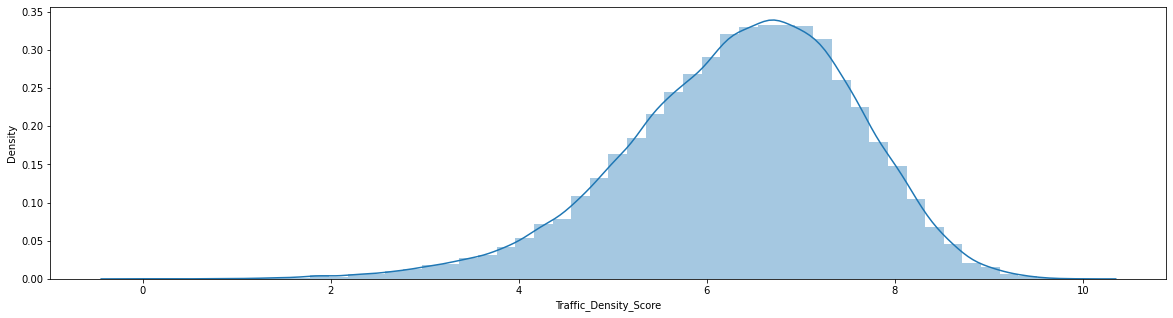

In [44]:
plt.figure(figsize=(20, 5))
sns.distplot(a=train.Traffic_Density_Score)
plt.show()

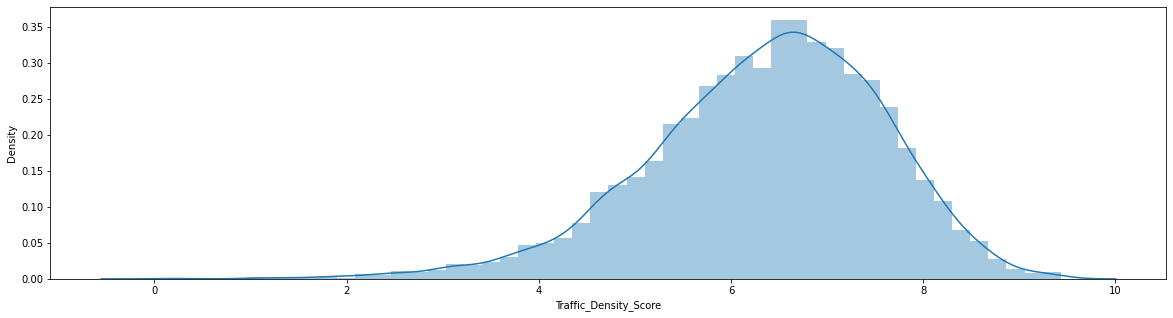

In [45]:
plt.figure(figsize=(20, 5))
sns.distplot(a=test.Traffic_Density_Score)
plt.show()

### Crime_Rate

In [46]:
train.Crime_Rate.value_counts(normalize=True, dropna=False)

Well below average        0.492975
Slightly below average    0.293172
Slightly above average    0.134257
Well above average        0.059672
NaN                       0.019925
Name: Crime_Rate, dtype: float64

In [47]:
test.Crime_Rate.value_counts(normalize=True, dropna=False)

Well below average        0.494190
Slightly below average    0.288762
Slightly above average    0.135333
Well above average        0.061524
NaN                       0.020190
Name: Crime_Rate, dtype: float64

In [48]:
crime_mapping = {
    'Well below average': 0,
    'Slightly below average': 1,
    'Slightly above average': 2,
    'Well above average': 3
}

train.Crime_Rate.replace(crime_mapping, inplace=True)
test.Crime_Rate.replace(crime_mapping, inplace=True)

### Dust_and_Noise

In [49]:
train.Dust_and_Noise.value_counts(normalize=True, dropna=False)

Medium    0.835363
High      0.081319
Low       0.052457
NaN       0.030862
Name: Dust_and_Noise, dtype: float64

In [50]:
test.Dust_and_Noise.value_counts(normalize=True, dropna=False)

Medium    0.840571
High      0.076381
Low       0.051619
NaN       0.031429
Name: Dust_and_Noise, dtype: float64

In [51]:
dust_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

train.Dust_and_Noise.replace(dust_mapping, inplace=True)
test.Dust_and_Noise.replace(dust_mapping, inplace=True)

### Air_Quality_Index

In [52]:
train.Air_Quality_Index.min(), test.Air_Quality_Index.min()

(0.0, 0.0)

In [53]:
train.Air_Quality_Index.max(), test.Air_Quality_Index.max()

(1044.0, 1031.0)

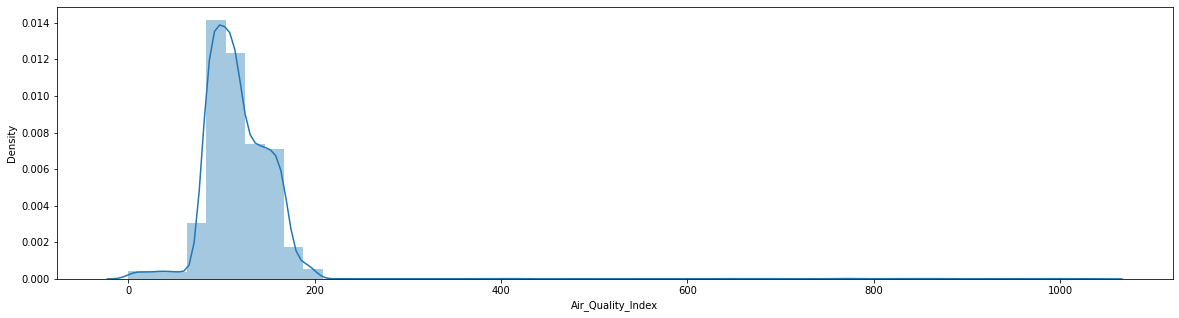

In [54]:
plt.figure(figsize=(20, 5))
sns.distplot(a=train.Air_Quality_Index)
plt.show()

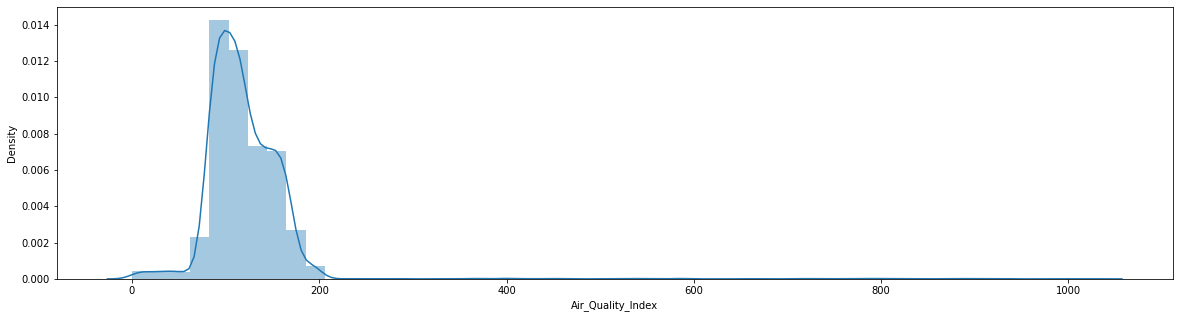

In [55]:
plt.figure(figsize=(20, 5))
sns.distplot(a=test.Air_Quality_Index)
plt.show()

Creating bins based on ranges in AQI guidelines: 0-50, 51-100, 101-150, 151-200, 201-200, 301+

In [56]:
aqi_bins = [0, 50, 100, 150, 200, 300, 1050]

train['aqi_range'] = pd.cut(x=train.Air_Quality_Index, 
                            bins=aqi_bins, 
                            include_lowest=True,
                            labels=False, 
                            ordered=True)

test['aqi_range'] = pd.cut(x=test.Air_Quality_Index, 
                            bins=aqi_bins, 
                            include_lowest=True,
                            labels=False, 
                            ordered=True)

### Neighborhood_Review

In [57]:
train.Neighborhood_Review.min(), test.Neighborhood_Review.min()

(0.0, 0.02)

In [58]:
train.Neighborhood_Review.max(), test.Neighborhood_Review.max()

(5.0, 5.0)

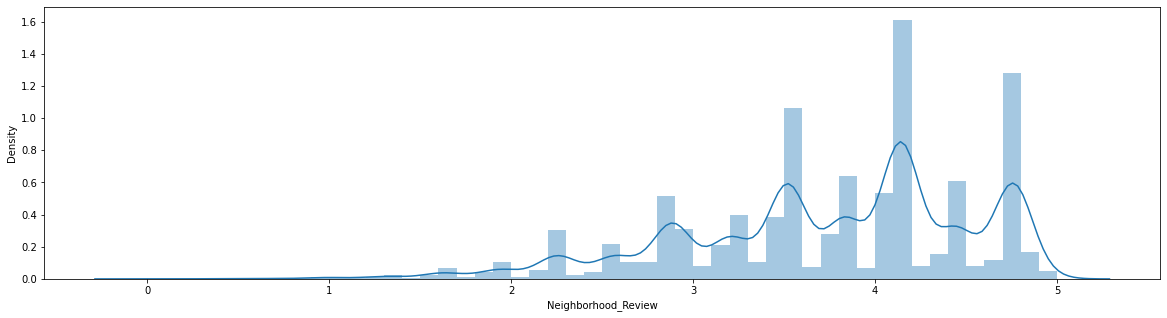

In [59]:
plt.figure(figsize=(20, 5))
sns.distplot(a=train.Neighborhood_Review)
plt.show()

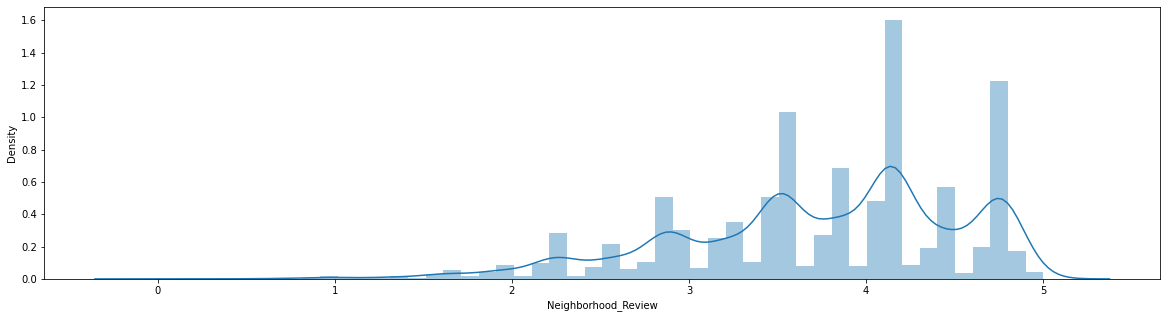

In [60]:
plt.figure(figsize=(20, 5))
sns.distplot(a=test.Neighborhood_Review)
plt.show()

# Missing values

In [61]:
train.isna().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
aqi_range                    0
dtype: int64

In [62]:
test.isna().sum()

Property_ID                 0
Property_Type               0
Property_Area               0
Number_of_Windows         445
Number_of_Doors             0
Furnishing                257
Frequency_of_Powercuts    366
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                212
Dust_and_Noise            330
Air_Quality_Index           0
Neighborhood_Review         0
aqi_range                   0
dtype: int64

In [63]:
features = list(test.columns)
features.remove('Property_ID')

### Number_of_Windows

In [64]:
train.groupby('Property_Type')['Number_of_Windows'].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
Property_Type,,,,,
0,13965,1.0,4.0,2.503473,3.0
1,11017,2.0,5.0,3.522284,4.0
2,5551,4.0,7.0,5.497928,5.0
3,4079,4.0,15.0,9.368718,9.0
4,2743,0.0,3.0,1.518410,2.0
5,490,0.0,15.0,3.734694,3.0


In [65]:
train.groupby('Property_Type')['Number_of_Windows'].transform('median')

0        3.0
1        3.0
2        3.0
3        3.0
4        9.0
        ... 
39494    4.0
39495    3.0
39496    9.0
39497    4.0
39498    4.0
Name: Number_of_Windows, Length: 39499, dtype: float64

In [66]:
train['Number_of_Windows'] = train['Number_of_Windows'].fillna(
    train.groupby('Property_Type')['Number_of_Windows'].transform('median')).astype('int')

test['Number_of_Windows'] = test['Number_of_Windows'].fillna(
    test.groupby('Property_Type')['Number_of_Windows'].transform('median')).astype('int')

### Furnishing

In [67]:
train.groupby('Property_Type')['Furnishing'].value_counts(normalize=True, dropna=False)

Property_Type  Furnishing
0              1.0           0.515552
               0.0           0.264799
               2.0           0.194231
               NaN           0.025418
1              1.0           0.517470
               0.0           0.258866
               2.0           0.197003
               NaN           0.026662
2              1.0           0.524457
               0.0           0.252325
               2.0           0.194282
               NaN           0.028936
3              1.0           0.497404
               0.0           0.276546
               2.0           0.197971
               NaN           0.028079
4              1.0           0.518106
               0.0           0.258357
               2.0           0.201950
               NaN           0.021588
5              1.0           0.494118
               0.0           0.252941
               2.0           0.221569
               NaN           0.031373
Name: Furnishing, dtype: float64

In [68]:
train['Furnishing'] = train['Furnishing'].fillna(1).astype('int')
test['Furnishing'] = test['Furnishing'].fillna(1).astype('int')

### Frequency_of_Powercuts

In [69]:
train.Frequency_of_Powercuts.value_counts(dropna=False)

0.0    24471
1.0    10010
2.0     2441
NaN     1383
3.0     1194
Name: Frequency_of_Powercuts, dtype: int64

In [70]:
train['Frequency_of_Powercuts'] = train['Frequency_of_Powercuts'].fillna(0).astype('int')
test['Frequency_of_Powercuts'] = test['Frequency_of_Powercuts'].fillna(0).astype('int')

### Crime_Rate

In [71]:
train.Crime_Rate.value_counts(normalize=True, dropna=False)

0.0    0.492975
1.0    0.293172
2.0    0.134257
3.0    0.059672
NaN    0.019925
Name: Crime_Rate, dtype: float64

In [72]:
train['Crime_Rate'] = train['Crime_Rate'].fillna(0).astype('int')
test['Crime_Rate'] = test['Crime_Rate'].fillna(0).astype('int')

### Dust_and_Noise

In [73]:
train.Dust_and_Noise.value_counts(normalize=True, dropna=False)

1.0    0.835363
2.0    0.081319
0.0    0.052457
NaN    0.030862
Name: Dust_and_Noise, dtype: float64

In [74]:
train.groupby('Dust_and_Noise')['aqi_range'].value_counts(normalize=True, sort=False)

Dust_and_Noise  aqi_range
0.0             0            0.360521
                1            0.431467
                2            0.156371
                3            0.043436
                4            0.000965
                5            0.007239
1.0             0            0.000667
                1            0.325403
                2            0.526276
                3            0.138744
                4            0.000788
                5            0.008122
2.0             0            0.005915
                1            0.054172
                2            0.401619
                3            0.529265
                4            0.000623
                5            0.008406
Name: aqi_range, dtype: float64

In [75]:
missing_mask = train['Dust_and_Noise'].isna()
fill_mapping = {0: 0, 1: 0, 2: 1, 3: 2, 4: 2, 5: 2} #aqi_range: Dust_and_Noise
train.loc[missing_mask, 'Dust_and_Noise'] = train.loc[missing_mask, 'aqi_range'].map(fill_mapping)

In [76]:
missing_mask = test['Dust_and_Noise'].isna()
test.loc[missing_mask, 'Dust_and_Noise'] = test.loc[missing_mask, 'aqi_range'].map(fill_mapping)

In [77]:
train['Dust_and_Noise'] = train['Dust_and_Noise'].astype('int')
test['Dust_and_Noise'] = test['Dust_and_Noise'].astype('int')

# Feature Selection

In [78]:
num_features = ['Property_Area', 'Number_of_Windows', 
                'Number_of_Doors', 'Traffic_Density_Score', 
                'Air_Quality_Index', 'Neighborhood_Review']

cat_features = [f for f in features if f not in num_features]

### Pearson correlation (numerical-numerical)

In [79]:
pearson_df = train[num_features + [TARGET]].corr()

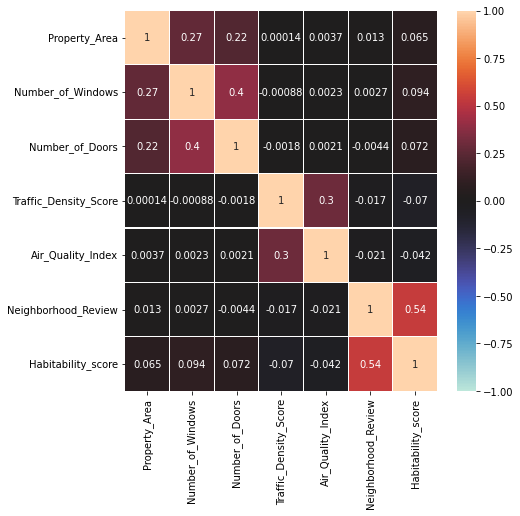

In [80]:
plt.figure(figsize=(7, 7))
sns.heatmap(pearson_df, vmin=-1, vmax=1, center=0, annot=True, linewidths=0.1)
plt.show()

### Kendall-tau correlation (categorical-numerical)

In [81]:
kendall_df = train[cat_features + [TARGET]].corr(method='kendall')

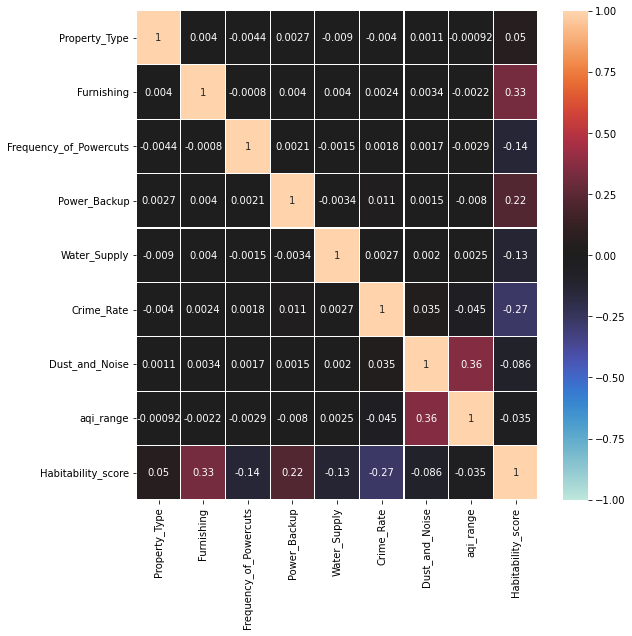

In [82]:
plt.figure(figsize=(9, 9))
sns.heatmap(kendall_df, vmin=-1, vmax=1, center=0, annot=True, linewidths=0.1)
plt.show()

### ANOVA

In [83]:
anova_test = f_classif(train[cat_features], train[TARGET])

pd.DataFrame(
    data={
        'f-statistic': anova_test[0], 
        'p-value': anova_test[1],
        'accepted?': anova_test[1] < 0.05
    },
    index=cat_features
)

,f-statistic,p-value,accepted?
Property_Type,1.039516,2.374192e-02,True
Furnishing,2.320077,0.000000e+00,True
Frequency_of_Powercuts,1.717685,1.034568e-187,True
Power_Backup,1.207958,5.052446e-23,True
Water_Supply,1.344788,6.081974e-55,True
Crime_Rate,2.756362,0.000000e+00,True
Dust_and_Noise,1.315662,3.376292e-47,True
aqi_range,1.053773,3.668493e-03,True


### Mutual Information score

In [84]:
cat_mask = [(f in cat_features) for f in features] #boolean mask for discrete features

mi_scores = mutual_info_regression(train[features], train[TARGET], 
                                   discrete_features=cat_mask, 
                                   random_state=SEED)

mi_score_percent = mi_scores / sum(mi_scores) * 100

pd.DataFrame(
    data={'mi_score': mi_scores,
          'mi_score_percent': mi_score_percent}, 
    index=features
)

,mi_score,mi_score_percent
Property_Type,0.012187,2.251851
Property_Area,0.008170,1.509624
Number_of_Windows,0.010641,1.966206
Number_of_Doors,0.001156,0.213527
Furnishing,0.110982,20.507283
Frequency_of_Powercuts,0.020330,3.756552
Power_Backup,0.051339,9.486368
Water_Supply,0.019459,3.595576
Traffic_Density_Score,0.012219,2.257853
Crime_Rate,0.091969,16.994059


### Variance Inflation Factor

In [85]:
%%capture
!pip install --upgrade statsmodels==0.13.2
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
def remove_vif_features(X: pd.DataFrame, threshold: float = 5.0) -> list:
    """Remove feature with highest Variance Inflation Factor
    at every iteration until all remaining features are below
    a certain threshold.
    """
    i = 0
    while True:
        vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
        max_vif = np.max(vif)

        if max_vif <= threshold:
            break

        i += 1
        col_to_remove = X.columns[np.argmax(vif)]
        print(f"Iteration {i}: {col_to_remove:20} ({max_vif:.4f})")
        X.drop(col_to_remove, axis=1, inplace=True)

    if i == 0:
        print(f"No columns removed")
    else:
        print(pd.DataFrame({"Feature": X.columns, "VIF": vif}))

    return list(X.columns)

**checking redundant features at different thresholds** (most redundant feature removed at each iteration)

In [87]:
_ = remove_vif_features(train[num_features].copy(), 10) #lenient threshold

Iteration 1: Traffic_Density_Score (17.5697)
               Feature       VIF
0        Property_Area  1.655423
1    Number_of_Windows  3.883442
2      Number_of_Doors  5.479926
3    Air_Quality_Index  4.158413
4  Neighborhood_Review  6.722730


In [88]:
_ = remove_vif_features(train[num_features].copy(), 5) #rule-of-thumb threshold

Iteration 1: Traffic_Density_Score (17.5697)
Iteration 2: Neighborhood_Review  (6.7227)
             Feature       VIF
0      Property_Area  1.652476
1  Number_of_Windows  3.729167
2    Number_of_Doors  4.504543
3  Air_Quality_Index  2.839701


In [89]:
_ = remove_vif_features(train[num_features].copy(), 2.5) #strictest threshold

Iteration 1: Traffic_Density_Score (17.5697)
Iteration 2: Neighborhood_Review  (6.7227)
Iteration 3: Number_of_Doors      (4.5045)
Iteration 4: Number_of_Windows    (2.5750)
             Feature       VIF
0      Property_Area  1.365658
1  Air_Quality_Index  1.365658


### Selected features

In [90]:
top_features = ['Neighborhood_Review', 'Furnishing', 'Crime_Rate', 'Power_Backup']

In [91]:
rejected_features = ['Number_of_Doors', 'Traffic_Density_Score', 'aqi_range']

reduced_features = [f for f in features if f not in rejected_features]

# Processed dataset

In [92]:
train[features].head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,aqi_range
0,0,106,3,1,1,0,0,1,5.89,1,1,90.0,3.86,1
1,0,733,2,2,0,1,0,2,4.37,0,1,96.0,3.55,1
2,0,737,4,2,2,0,0,1,7.45,1,1,121.0,3.81,2
3,0,900,3,2,0,2,1,1,6.16,3,1,100.0,1.34,1
4,3,2238,14,6,2,0,0,0,5.46,0,1,116.0,4.77,2


In [93]:
train['Air_Quality_Index'] = train['Air_Quality_Index'].astype('int')
test['Air_Quality_Index'] = test['Air_Quality_Index'].astype('int')

In [98]:
test.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,aqi_range
0,0x6e93,0,293,3,1,0,0,0,1,7.28,3,1,152,2.52,3
1,0x8787,0,586,4,1,1,0,0,2,7.63,0,1,92,4.16,1
2,0x6c17,4,305,1,2,1,1,0,0,5.39,2,1,90,2.92,1
3,0x9dbd,0,258,2,1,1,1,0,0,7.53,1,1,158,3.45,3
4,0xbfde,3,3031,12,4,2,0,0,0,8.79,3,2,186,2.72,3


In [99]:
train[features].to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False) #need to retain Property_ID for submission file

In [100]:
# from google.colab import files
# files.download('train.csv')
# files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>